In [1]:
%%time
import yfinance as yf
import os
import sys
print(os.getcwd())
#print(sys.path)
print(os.__file__)
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 
import matplotlib
import matplotlib.pyplot as plt
import io, base64, os, json, re
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import scipy.optimize as optimize
pd.set_option('display.max_rows', 500)
from pandas_datareader import data as pdr
from pandas.plotting import scatter_matrix
from scipy.stats import variation, norm
import time
import scipy.interpolate as sci

C:\Users\xcy99\Desktop\mypythonscripts
C:\Users\xcy99\anaconda3\lib\os.py
Wall time: 2.41 s


In [2]:
# # download tickers from weblink
# %%time

# import pandas as pd
# import requests
# import io

# url = 'https://old.nasdaq.com/screening/companies-by-name.aspx?letter=0&exchange=nasdaq&render=download'
# r = requests.post(url)
# if r.ok:
#     data = r.content.decode('utf8')
#     df = pd.read_csv(io.StringIO(data))
# df.head()

In [3]:
%%time
tickers_df = pd.read_csv('companylist.csv')
print(len(tickers_df))
tickers_df = tickers_df.loc[tickers_df['MarketCap'].str.contains(r'B',na=True)]
print(len(tickers_df))
tickers_df = tickers_df.dropna(subset=['Sector','industry','LastSale','IPOyear'],axis=0,how='any')
print(len(tickers_df))
tickers_df = tickers_df.loc[tickers_df['IPOyear']<2007]
print(len(tickers_df))
tickers_df

3849
1888
831
234
Wall time: 50.7 ms


,Symbol,Name,LastSale,MarketCap,IPOyear,Sector,industry,Summary Quote,Unnamed: 8
7,FLWS,"1-800-FLOWERS.COM, Inc.",21.370,$1.38B,1999.0,Consumer Services,Other Specialty Stores,https://old.nasdaq.com/symbol/flws,NaN
17,JOBS,"51job, Inc.",69.700,$4.68B,2004.0,Technology,Diversified Commercial Services,https://old.nasdaq.com/symbol/jobs,NaN
33,ACAD,ACADIA Pharmaceuticals Inc.,47.350,$7.52B,1985.0,Health Care,Major Pharmaceuticals,https://old.nasdaq.com/symbol/acad,NaN
72,ADBE,Adobe Inc.,461.110,$221.2B,1986.0,Technology,Computer Software: Prepackaged Software,https://old.nasdaq.com/symbol/adbe,NaN
75,AEIS,"Advanced Energy Industries, Inc.",69.020,$2.65B,1995.0,Capital Goods,Industrial Machinery/Components,https://old.nasdaq.com/symbol/aeis,NaN
121,AKAM,"Akamai Technologies, Inc.",95.820,$15.59B,1999.0,Miscellaneous,Business Services,https://old.nasdaq.com/symbol/akam,NaN
141,ALXN,"Alexion Pharmaceuticals, Inc.",118.210,$25.91B,1996.0,Health Care,Major Pharmaceuticals,https://old.nasdaq.com/symbol/alxn,NaN
144,ALGN,"Align Technology, Inc.",436.570,$34.4B,2001.0,Health Care,Industrial Specialties,https://old.nasdaq.com/symbol/algn,NaN
149,ALKS,Alkermes plc,16.280,$2.59B,1991.0,Health Care,Major Pharmaceuticals,https://old.nasdaq.com/symbol/alks,NaN
152,ALGT,Allegiant Travel Company,137.570,$2.23B,2006.0,Transportation,Air Freight/Delivery Services,https://old.nasdaq.com/symbol/algt,NaN


In [40]:
%%time
# get tickers from csv

tickers_list = tickers_df.iloc[:,0].tolist()
tickers_str = " ".join(tickers_list)
tickers_str

Wall time: 0 ns


'FLWS JOBS ACAD ADBE AEIS AKAM ALXN ALGN ALKS ALGT ALNY GOOG AIMC AMZN AMWD ABCB AMSF AMGN AMKR ANSS AAPL AMAT ARNA ASML AZPN ASTE ATRC BIDU BANF BECN BBBY BMRN BLKB EPAY BRKS BLDR CHRW CALM CSIQ CSII CWST CASY CENT CERN GTLS CHKP CTAS CRUS CSCO CTXS CCMP CME COKE CGNX CTSH COLB COLM CVLT CGEN CNMD CPRT CORT CSGP CBRL CACC CREE CROX CSGS CYTK XRAY DXCM DISH DLTR EBAY EHTH ENTG EQIX EEFT EXAS EXEL EXLS FFIV FARO FAST FSLR FCFS FISV FLEX FLIR FORM GRMN ROCK GILD OMAB HCSG HTLD HSIC HSKA HMSY HOLX HOMB HUBG ICFI ICLR ICUI IDXX INFO IIVI ILMN IMGN NSIT INTU ISRG IPGP IRBT ITRI JJSF JCOM JKHY JBLU KLAC LRCX LAMR LSTR LHCG LPSN LOGI LMNX MANH MANT MKTX MRTN MRVL MXIM MGRC MRCY CASH MCHP MSFT MSTR MKSI MPWR MNRO MORN NATI NEOG NTAP NFLX NTCT NBIX NXST EGOV NVMI NUVA NVDA ODFL OMCL OTEX ORLY OSIS OSTK PZZA PDCO PAYX PEGA PENN PRFT PLUG POOL POWI PRAA PFG PRGS QCOM RDWR RMBS ROLL REG REGN RCII RGEN ROST RYAAY SAFT SAFM SGMO SANM SPNS SBAC STX SGEN SEIC SBNY SLGN SLAB SIMO SBGI SKYW STMP SBUX ST

In [41]:
%%time

yf.pdr_override() 
# download dataframe
data = pdr.get_data_yahoo(tickers_str, start="2007-01-01", end="2020-10-25")["Adj Close"] # history lookback configuration

# same data if rerun
data_save = data
data

[*********************100%***********************]  234 of 234 completed
Wall time: 26.8 s


,AAPL,ABCB,ACAD,ADBE,AEIS,AIMC,AKAM,ALGN,ALGT,ALKS,...,VRNT,VRSN,VRTX,VSAT,WDFC,WERN,WYNN,XLNX,XRAY,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-03,2.586245,23.538689,8.770000,39.919998,18.750000,12.222489,52.070000,13.350000,23.271708,13.090000,...,34.840000,20.439066,36.900002,29.730000,25.171997,10.026054,56.741970,17.230139,27.526897,34.880001
2007-01-04,2.643649,23.925396,8.640000,40.820000,18.889999,11.971992,53.299999,13.600000,23.271708,13.580000,...,34.259998,20.872135,36.990002,29.790001,25.253231,10.437703,56.765545,17.638813,27.609499,34.680000
2007-01-05,2.624823,23.437805,8.300000,40.619999,18.629999,11.963355,53.189999,13.640000,23.254950,13.580000,...,34.209999,20.880627,35.810001,29.540001,24.632799,10.189058,57.101517,17.478264,27.609499,34.330002
2007-01-08,2.637785,23.639576,8.070000,40.450001,18.879999,12.032458,53.009998,13.680000,22.609674,13.800000,...,34.950001,20.736269,33.549999,29.730000,24.699282,10.205635,58.180126,17.587736,27.765543,34.400002
2007-01-09,2.856907,23.706820,7.900000,39.630001,18.660000,12.092922,52.669998,13.700000,22.618057,13.920000,...,34.830002,20.736269,33.869999,29.670000,24.780521,10.299570,58.409985,17.507460,27.774721,34.340000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-19,115.980003,25.879999,41.490002,495.200012,73.180000,39.540001,109.410004,326.839996,132.559998,16.920000,...,52.560001,203.169998,220.509995,34.299999,195.750000,41.220001,69.669998,116.379997,44.599998,291.570007
2020-10-20,117.510002,26.850000,41.209999,494.579987,72.599998,39.389999,109.300003,334.600006,134.419998,16.920000,...,52.330002,203.960007,214.539993,34.980000,197.500000,41.509998,72.440002,114.730003,44.709999,294.829987
2020-10-21,116.870003,27.650000,41.040001,495.959991,72.820000,39.340000,109.019997,335.809998,132.479996,16.260000,...,51.660000,205.559998,211.380005,34.759998,234.610001,41.369999,72.849998,111.300003,45.669998,291.859985


In [42]:
%%time
# clean data
data = data.dropna(axis=1,how='all')
data = data.fillna(method='ffill')
data = data.fillna(method='bfill')
data.drop('TBIO', inplace=True, axis=1) #some data issue
data

Wall time: 19.9 ms


,AAPL,ABCB,ACAD,ADBE,AEIS,AIMC,AKAM,ALGN,ALGT,ALKS,...,VRNT,VRSN,VRTX,VSAT,WDFC,WERN,WYNN,XLNX,XRAY,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-03,2.586245,23.538689,8.770000,39.919998,18.750000,12.222489,52.070000,13.350000,23.271708,13.090000,...,34.840000,20.439066,36.900002,29.730000,25.171997,10.026054,56.741970,17.230139,27.526897,34.880001
2007-01-04,2.643649,23.925396,8.640000,40.820000,18.889999,11.971992,53.299999,13.600000,23.271708,13.580000,...,34.259998,20.872135,36.990002,29.790001,25.253231,10.437703,56.765545,17.638813,27.609499,34.680000
2007-01-05,2.624823,23.437805,8.300000,40.619999,18.629999,11.963355,53.189999,13.640000,23.254950,13.580000,...,34.209999,20.880627,35.810001,29.540001,24.632799,10.189058,57.101517,17.478264,27.609499,34.330002
2007-01-08,2.637785,23.639576,8.070000,40.450001,18.879999,12.032458,53.009998,13.680000,22.609674,13.800000,...,34.950001,20.736269,33.549999,29.730000,24.699282,10.205635,58.180126,17.587736,27.765543,34.400002
2007-01-09,2.856907,23.706820,7.900000,39.630001,18.660000,12.092922,52.669998,13.700000,22.618057,13.920000,...,34.830002,20.736269,33.869999,29.670000,24.780521,10.299570,58.409985,17.507460,27.774721,34.340000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-19,115.980003,25.879999,41.490002,495.200012,73.180000,39.540001,109.410004,326.839996,132.559998,16.920000,...,52.560001,203.169998,220.509995,34.299999,195.750000,41.220001,69.669998,116.379997,44.599998,291.570007
2020-10-20,117.510002,26.850000,41.209999,494.579987,72.599998,39.389999,109.300003,334.600006,134.419998,16.920000,...,52.330002,203.960007,214.539993,34.980000,197.500000,41.509998,72.440002,114.730003,44.709999,294.829987
2020-10-21,116.870003,27.650000,41.040001,495.959991,72.820000,39.340000,109.019997,335.809998,132.479996,16.260000,...,51.660000,205.559998,211.380005,34.759998,234.610001,41.369999,72.849998,111.300003,45.669998,291.859985


In [43]:
%%time
# change price to log return

df = pd.DataFrame() 
for i in data:
    if i not in df:#so rerunning the cell will not double add
    # Calculates the difference of a Dataframe element compared with another element in the Dataframe (default is element in previous row).
        df[i] = np.log(data[i]).diff() 
df = df[1:]
df

Wall time: 222 ms


,AAPL,ABCB,ACAD,ADBE,AEIS,AIMC,AKAM,ALGN,ALGT,ALKS,...,VRNT,VRSN,VRTX,VSAT,WDFC,WERN,WYNN,XLNX,XRAY,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-04,0.021953,0.016295,-0.014934,0.022295,0.007439,-0.020708,0.023347,0.018553,0.000000,0.036750,...,-0.016788,0.020967,0.002436,0.002016,0.003222,0.040237,0.000415,0.023442,0.002996,-0.005750
2007-01-05,-0.007147,-0.020590,-0.040147,-0.004912,-0.013860,-0.000722,-0.002066,0.002937,-0.000720,0.000000,...,-0.001460,0.000407,-0.032420,-0.008427,-0.024875,-0.024110,0.005901,-0.009144,0.000000,-0.010143
2007-01-08,0.004926,0.008572,-0.028102,-0.004194,0.013330,0.005760,-0.003390,0.002928,-0.028140,0.016070,...,0.021401,-0.006937,-0.065190,0.006411,0.002695,0.001626,0.018713,0.006244,0.005636,0.002037
2007-01-09,0.079800,0.002840,-0.021291,-0.020480,-0.011721,0.005012,-0.006435,0.001461,0.000371,0.008658,...,-0.003439,0.000000,0.009493,-0.002020,0.003284,0.009162,0.003943,-0.004575,0.000331,-0.001746
2007-01-10,0.046746,0.004953,-0.001267,-0.010400,0.014366,-0.007169,0.021042,0.013773,-0.000741,0.017094,...,0.000574,0.001637,0.043334,-0.006085,-0.024744,-0.004840,0.033245,0.015715,0.004945,0.000873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-19,-0.025874,-0.003857,-0.026637,-0.015271,-0.001093,-0.031859,-0.011812,-0.029187,0.018809,-0.012335,...,-0.007393,-0.020317,0.011081,-0.012171,-0.011075,-0.041579,-0.020599,-0.013993,-0.023927,-0.004892
2020-10-20,0.013106,0.036795,-0.006772,-0.001253,-0.007957,-0.003801,-0.001006,0.023465,0.013934,0.000000,...,-0.004386,0.003881,-0.027447,0.019631,0.008900,0.007011,0.038989,-0.014279,0.002463,0.011119
2020-10-21,-0.005461,0.029360,-0.004134,0.002786,0.003026,-0.001270,-0.002565,0.003610,-0.014538,-0.039788,...,-0.012886,0.007814,-0.014839,-0.006309,0.172186,-0.003378,0.005644,-0.030352,0.021244,-0.010125


In [44]:
# # if want to graph
# scatter_matrix(df,figsize=(10,10),alpha=0.5)
# sns.heatmap(df.corr(), annot=True, fmt='.1g',cmap=plt.cm.Blues) 
# plt.show()

In [45]:
%%time
# print(df.corr().idxmin(axis=0))
print(df.corr().unstack().sort_values(kind='quicksort').drop_duplicates().head(10))
print(df.corr().unstack().sort_values(kind='quicksort').drop_duplicates().tail(10))

ACAD  SPNS    0.032700
CASH  PRSC    0.039189
SPNS  SAFM    0.040157
HSKA  SPNS    0.047029
SPNS  DLTR    0.047574
HSKA  HMSY    0.049049
SPNS  CALM    0.050920
PRSC  SPNS    0.051660
OSIS  SPNS    0.052336
NFLX  SPNS    0.052995
dtype: float64
MCHP  AMAT    0.706988
MKSI  AMAT    0.714826
LRCX  MKSI    0.715748
PFG   TROW    0.722025
TROW  SEIC    0.738673
WERN  HTLD    0.763114
KLAC  AMAT    0.773130
LRCX  AMAT    0.800469
      KLAC    0.814091
AAPL  AAPL    1.000000
dtype: float64
Wall time: 917 ms


In [46]:
df.describe()

,AAPL,ABCB,ACAD,ADBE,AEIS,AIMC,AKAM,ALGN,ALGT,ALKS,...,VRNT,VRSN,VRTX,VSAT,WDFC,WERN,WYNN,XLNX,XRAY,ZBRA
count,3480.000000,3480.000000,3480.000000,3480.000000,3480.000000,3480.000000,3480.000000,3480.000000,3480.000000,3480.000000,...,3480.000000,3480.000000,3480.000000,3480.000000,3480.000000,3480.000000,3480.000000,3480.000000,3480.000000,3480.000000
mean,0.001091,0.000061,0.000458,0.000720,0.000389,0.000373,0.000206,0.001023,0.000520,0.000065,...,0.000117,0.000657,0.000502,0.000053,0.000642,0.000406,0.000086,0.000550,0.000167,0.000622
std,0.020537,0.033461,0.056307,0.021321,0.030725,0.030807,0.027409,0.031505,0.029080,0.030753,...,0.025880,0.020673,0.029582,0.024119,0.018450,0.020327,0.033952,0.020443,0.017190,0.022409
min,-0.197470,-0.286720,-1.071584,-0.211148,-0.254871,-0.338067,-0.291851,-0.408781,-0.333097,-0.584119,...,-0.365800,-0.168089,-0.231875,-0.286255,-0.158005,-0.115316,-0.280172,-0.187258,-0.206306,-0.272411
25%,-0.007830,-0.011807,-0.021031,-0.008337,-0.014321,-0.012537,-0.010573,-0.012199,-0.012046,-0.014639,...,-0.009564,-0.007744,-0.013460,-0.010055,-0.007573,-0.009742,-0.014958,-0.009133,-0.007465,-0.009134
50%,0.001079,0.000000,0.000000,0.001182,0.000749,0.000620,0.000701,0.000976,0.000361,0.000000,...,0.000000,0.000930,-0.000154,0.000473,0.001058,0.000528,-0.000412,0.000593,0.000682,0.000903
75%,0.011427,0.012410,0.020165,0.010824,0.015532,0.012973,0.012186,0.014397,0.013719,0.015160,...,0.009897,0.009158,0.013853,0.010542,0.009107,0.011206,0.014749,0.010633,0.008467,0.010457
max,0.130194,0.270875,0.859030,0.163133,0.229227,0.203113,0.215397,0.299854,0.290442,0.245552,...,0.336056,0.158726,0.481849,0.260177,0.172186,0.140309,0.261537,0.169208,0.162531,0.158833


In [47]:
%%time
# find coefficient of  variation for dispersion of the distribution in relation to the mean
# lower CV should be better than higher cv in general

std_dict={}
for i in df.columns:
    std_dict[i]=np.std(df[i])

mean_dict={}
for i in df.columns:
    mean_dict[i]=np.mean(df[i])

cv_dict={}
for i in df.columns:
    cv_dict[i]=std_dict[i]/abs(mean_dict[i]) if abs(mean_dict[i]) != 0 else 0
    
display(sorted(std_dict.items(),key=lambda x: x[1],reverse=True)[:5])
display(sorted(mean_dict.items(),key=lambda x: x[1],reverse=True)[:5])
print("CV from lowest to highest")
display(sorted(cv_dict.items(),key=lambda x: x[1],reverse=False)[:10])

[('PLUG', 0.05957780005792152),
 ('ACAD', 0.05629878133697484),
 ('SGMO', 0.049595971879922526),
 ('CYTK', 0.04773821314764397),
 ('CSIQ', 0.0476341623877895)]

[('NFLX', 0.0013952620911809174),
 ('AMZN', 0.0012690920960101591),
 ('RGEN', 0.0011903115061899768),
 ('MKTX', 0.001104097770828783),
 ('AAPL', 0.0010905381522363143)]

CV from lowest to highest


[('AAPL', 18.829616034234487),
 ('AMZN', 18.936430949666896),
 ('IDXX', 20.883131500314303),
 ('CPRT', 22.235855516245106),
 ('NFLX', 23.53857558762175),
 ('ORLY', 24.1758676219675),
 ('ODFL', 24.85008803207439),
 ('ROST', 25.112965730064207),
 ('INTU', 25.127488797911877),
 ('JKHY', 25.36618021957946)]

Wall time: 38 ms


In [48]:
%%time

investment = 10000 # 10k usd
confidence = 0.05 # The interval has an associated confidence level that the true parameter is in the proposed range.
################################# investing portfolio configuration
#df_invest = df.iloc[:,0:10] # choose how many stocks in our investing portfolio
df_invest = df.iloc[:,:] 
###################################
weights = np.array(len(df_invest.columns) * [1/len(df_invest.columns)])
print(weights)
display(df_invest.cov())
print(len(np.mean(df_invest)))
print(len(weights))
portfolio_mean_pct_return = np.mean(df_invest).dot(weights) #this means sum product of 2 arrays not matrix dot multiplier
print('mu is '+str(portfolio_mean_pct_return))
portfolio_std_pct_return = np.sqrt(weights.T.dot(df_invest.cov()).dot(weights )) #w'.SIGMA.w
print('sigma is '+str(portfolio_std_pct_return))

[0.00429185 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185
 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185
 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185
 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185
 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185
 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185
 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185
 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185
 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185
 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185
 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185
 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185
 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185
 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185
 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185 0.0042

,AAPL,ABCB,ACAD,ADBE,AEIS,AIMC,AKAM,ALGN,ALGT,ALKS,...,VRNT,VRSN,VRTX,VSAT,WDFC,WERN,WYNN,XLNX,XRAY,ZBRA
AAPL,0.000422,0.000251,0.000286,0.000219,0.000277,0.000251,0.000214,0.000216,0.000164,0.000172,...,0.000133,0.000201,0.000183,0.000183,0.000123,0.000147,0.000283,0.000189,0.000129,0.000195
ABCB,0.000251,0.001120,0.000494,0.000282,0.000454,0.000523,0.000283,0.000335,0.000357,0.000305,...,0.000201,0.000261,0.000243,0.000382,0.000269,0.000280,0.000507,0.000255,0.000243,0.000263
ACAD,0.000286,0.000494,0.003170,0.000336,0.000415,0.000435,0.000314,0.000377,0.000287,0.000494,...,0.000215,0.000316,0.000427,0.000308,0.000254,0.000251,0.000487,0.000283,0.000234,0.000288
ADBE,0.000219,0.000282,0.000336,0.000455,0.000318,0.000294,0.000254,0.000270,0.000187,0.000216,...,0.000180,0.000231,0.000216,0.000200,0.000158,0.000171,0.000309,0.000229,0.000159,0.000220
AEIS,0.000277,0.000454,0.000415,0.000318,0.000944,0.000467,0.000313,0.000365,0.000299,0.000274,...,0.000222,0.000266,0.000255,0.000337,0.000208,0.000239,0.000433,0.000334,0.000231,0.000293
AIMC,0.000251,0.000523,0.000435,0.000294,0.000467,0.000949,0.000281,0.000389,0.000298,0.000327,...,0.000238,0.000261,0.000251,0.000363,0.000224,0.000261,0.000525,0.000274,0.000256,0.000289
AKAM,0.000214,0.000283,0.000314,0.000254,0.000313,0.000281,0.000751,0.000238,0.000179,0.000224,...,0.000158,0.000259,0.000204,0.000205,0.000156,0.000198,0.000318,0.000223,0.000145,0.000220
ALGN,0.000216,0.000335,0.000377,0.000270,0.000365,0.000389,0.000238,0.000993,0.000262,0.000268,...,0.000208,0.000233,0.000248,0.000280,0.000177,0.000225,0.000388,0.000225,0.000223,0.000252
ALGT,0.000164,0.000357,0.000287,0.000187,0.000299,0.000298,0.000179,0.000262,0.000846,0.000210,...,0.000138,0.000172,0.000178,0.000269,0.000158,0.000213,0.000338,0.000173,0.000161,0.000189
ALKS,0.000172,0.000305,0.000494,0.000216,0.000274,0.000327,0.000224,0.000268,0.000210,0.000946,...,0.000157,0.000199,0.000320,0.000221,0.000162,0.000179,0.000308,0.000186,0.000188,0.000219


233
233
mu is 0.00043049146244056405
sigma is 0.015035207445909323
Wall time: 205 ms


In [49]:
%%time
var_z = norm.ppf(confidence, 0, 1)
# ppf is the cdf or area under pdf

num_days = int(5)
for x in range(1,num_days+1):
# aV[x] = V[sqrt(a)*x]
# this is saying we are 95% confident that our portfolio of 10k USD will not lose more than the amount over next few days
    abs_var = np.round(investment*(var_z*portfolio_std_pct_return+portfolio_mean_pct_return)*np.sqrt(x),0) 
    relative_var = np.round(investment*(var_z*portfolio_std_pct_return)*np.sqrt(x),0)
    print(str(x)+' day absolute VaR @ 95% confidence: '+str(abs_var))
    print(str(x)+' day relative VaR @ 95% confidence: '+str(relative_var))

1 day absolute VaR @ 95% confidence: -243.0
1 day relative VaR @ 95% confidence: -247.0
2 day absolute VaR @ 95% confidence: -344.0
2 day relative VaR @ 95% confidence: -350.0
3 day absolute VaR @ 95% confidence: -421.0
3 day relative VaR @ 95% confidence: -428.0
4 day absolute VaR @ 95% confidence: -486.0
4 day relative VaR @ 95% confidence: -495.0
5 day absolute VaR @ 95% confidence: -543.0
5 day relative VaR @ 95% confidence: -553.0
Wall time: 4 ms


In [50]:
%%time
#portfolio construction, simulation, and optimization
# this cell is for experimenting
'''
inear map [0,1] to [-1,1] to cope for short selling negative dirichlet distribution weights
I found a good way to do the transformation for dimension higher than 3 and posted on stackexchange
https://stackoverflow.com/questions/63910689/transformed-dirichlet-array-with-range-1-1-in-numpy/64656760#64656760
'''
weights = np.random.dirichlet(alpha=np.ones(len(df_invest.columns)), size=1) # generates a random array of weights for each asset that sum to 1 and assume all money will be deploye
weights = 1/(len(df_invest.columns)/3)-2*weights
print(weights,np.sum(weights))
weights = weights[0]
exp_port_return = np.sum(df_invest.mean()*weights) 
print('portfolio expected return in the period defined by me '+str(exp_port_return))

port_var = np.dot(weights.T, np.dot(df_invest.cov(), weights))
port_vol = np.sqrt(port_var)
print('portfolio variance '+str(port_var))
print('portfolio risk or volatility '+str(port_vol))

[[-4.35336568e-03  6.84077206e-03  9.95586715e-03  6.70069500e-03
   8.54687974e-03  5.94472014e-03  9.43721638e-03 -2.69254205e-03
   6.41844973e-03  1.01781872e-02  1.15203199e-02  7.75480736e-03
   1.24044271e-02  7.44575102e-03  1.51599330e-03  7.16139008e-03
   2.43045387e-03  1.11161859e-02  7.95974967e-03  1.16563963e-02
   6.28037774e-03 -5.71493707e-03 -1.72210355e-02  1.12478982e-02
   2.85957343e-03  1.06274643e-02  6.49016041e-03 -4.80637324e-03
  -1.00977908e-02 -7.31915172e-03  3.12899257e-03  3.75811003e-03
   1.08071200e-02  1.21588033e-02  8.90884170e-03  1.20586312e-02
  -2.98761572e-03  8.00296133e-03 -1.81645900e-02  5.79967439e-03
   9.09103940e-03  1.26020770e-02  1.37263534e-03 -1.61914222e-02
  -4.54379502e-04  8.64870214e-03  1.26038792e-02  2.53058352e-03
  -3.59020206e-03  8.54752950e-03  9.65151446e-03  9.73787692e-03
   4.57310646e-03  1.13818836e-02  2.92309400e-03  8.55970341e-03
   4.21687547e-03  1.07170191e-02  3.21712322e-03  8.57477273e-03
   2.26597

Elapsed Time: 127.42 seconds
Wall time: 2min 7s


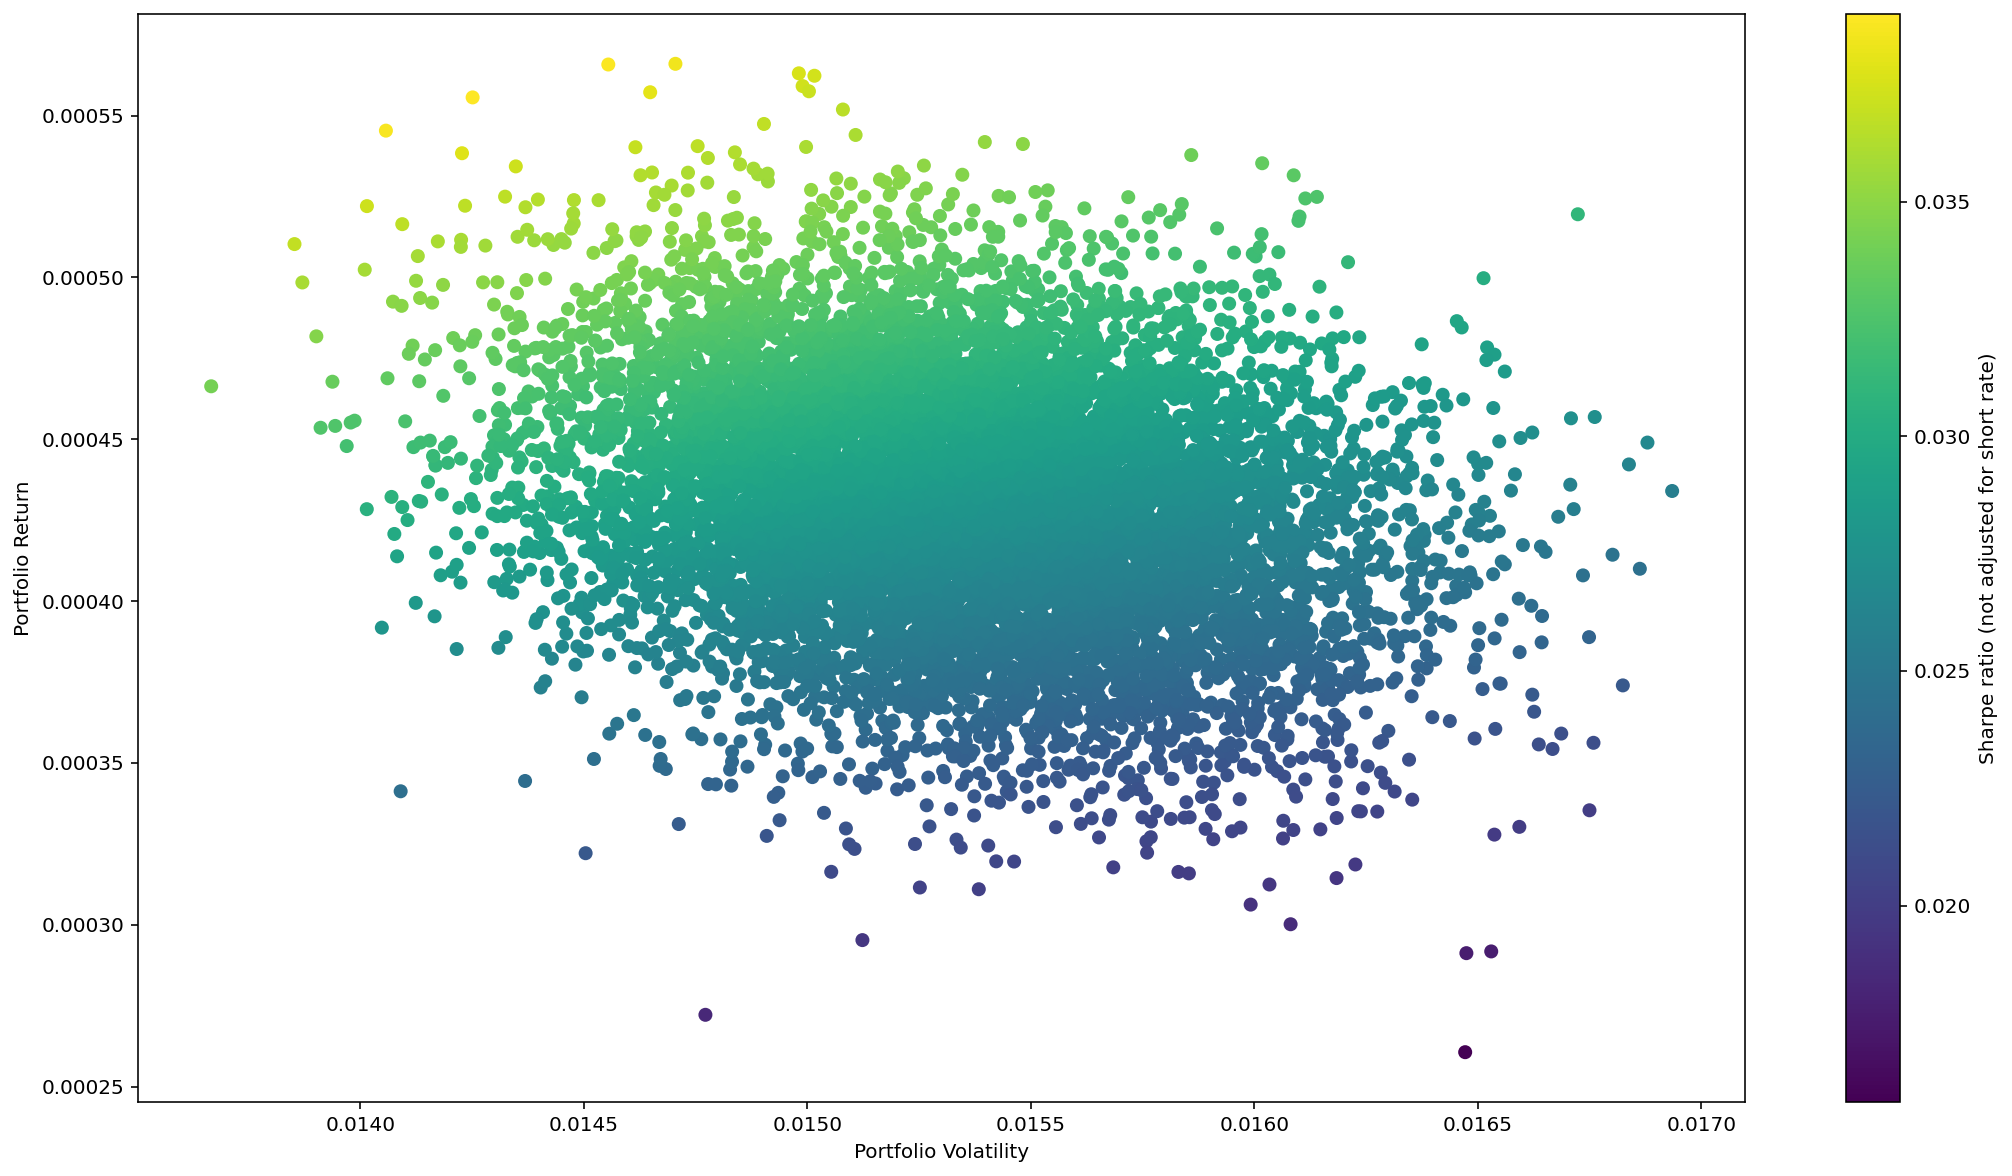

In [51]:
%%time
def portfolio_simulation(assets, iterations): 
    start = time.time() 
    num_assets = len(assets) 
    port_returns = [] 
    port_vols = []
    for i in range (iterations):
        # linear map [0,1] to [-1,1] to cope for short selling negative dirichlet distribution weights
        weights =  1/(len(df_invest.columns)/3)-2*np.random.dirichlet(alpha=np.ones(num_assets),size=1)
        weights = weights[0]
        #print(weights) # this would print all iterations of weights
        # if sample days are too few, mean will be close to zero or less than zero. so frontier will have upper half missing
        port_returns.append(np.sum(df_invest.mean()*weights)) #same as using .dot() for sum product
        port_vols.append(np.sqrt(np.dot(weights.T, np.dot(df_invest.cov(), weights)))) #.dot() means matrix multiplication or sum product
    # Convert lists to arrays
    port_returns = np.array(port_returns) 
    port_vols = np.array(port_vols)
    # Plot the distribution of portfolio returns and volatilities
    plt.figure(figsize = (18,10))
    plt.scatter(port_vols,port_returns,c=(port_returns/port_vols),marker= 'o')
    plt.xlabel('Portfolio Volatility')
    plt.ylabel('Portfolio Return')
    plt.colorbar(label = 'Sharpe ratio (not adjusted for short rate)')
    print('Elapsed Time: %.2f seconds' % (time.time() - start))
    return port_returns, port_vols

port_returns, port_vols = portfolio_simulation(df_invest.columns, 10000)

In [52]:
%%time
def portfolio_stats(weights):
    # Convert to array in case list was passed instead.
    weights = np.array(weights)
    port_return = np.sum(df_invest.mean() * weights)
    port_vol = np.sqrt(np.dot(weights.T, np.dot(df_invest.cov(), weights))) 
    sharpe = (port_return-0)/port_vol # assume risk free rate is 0
    return {'return':port_return,'volatility':port_vol,'sharpe':sharpe}

# this is when slope of the efficent frontier is highest
def minimize_sharpe(weights): #minimize negative sharpe=max sharp
    return -portfolio_stats(weights)['sharpe']

# when variance is minimized, it is the GMVP
def minimize_volatility(weights):
    # Note that we don't return the negative of volatility here because we want the absolute value of volatility to shrink, unlike sharpe. 
    return portfolio_stats(weights)['volatility']

# portfolio return is usually given by simulating a range of portfolio weights
def minimize_return(weights): #again minimize negative return
    return -portfolio_stats(weights)['return']

# Initialize optimization parameters
constraints = ({'type' : 'eq', 'fun': lambda x: np.sum(x) -1}) # sum of weight is 1
# portfolio short-sell ss configuration
bounds = tuple((-1,1) for x in weights) # weights as defined earlier was already set for each asset column
# start from equally weighted for 2D optimization, risk and return
initializer = len(df_invest.columns) * [1/len(df_invest.columns)] # constant times an array

print(constraints)
print(initializer)
print(bounds)


{'type': 'eq', 'fun': <function <lambda> at 0x000002888C5B3790>}
[0.004291845493562232, 0.004291845493562232, 0.004291845493562232, 0.004291845493562232, 0.004291845493562232, 0.004291845493562232, 0.004291845493562232, 0.004291845493562232, 0.004291845493562232, 0.004291845493562232, 0.004291845493562232, 0.004291845493562232, 0.004291845493562232, 0.004291845493562232, 0.004291845493562232, 0.004291845493562232, 0.004291845493562232, 0.004291845493562232, 0.004291845493562232, 0.004291845493562232, 0.004291845493562232, 0.004291845493562232, 0.004291845493562232, 0.004291845493562232, 0.004291845493562232, 0.004291845493562232, 0.004291845493562232, 0.004291845493562232, 0.004291845493562232, 0.004291845493562232, 0.004291845493562232, 0.004291845493562232, 0.004291845493562232, 0.004291845493562232, 0.004291845493562232, 0.004291845493562232, 0.004291845493562232, 0.004291845493562232, 0.004291845493562232, 0.004291845493562232, 0.004291845493562232, 0.004291845493562232, 0.00429184

In [53]:
%%time
# highest sharp portfolio but not necessarily least risk

optimal_sharpe = optimize.minimize(minimize_sharpe,initializer,method = 'SLSQP',bounds=bounds,constraints=constraints)
print(optimal_sharpe)

optimal_sharpe_weights = optimal_sharpe['x'].round(2)
display(list(zip(df_invest.columns,list(optimal_sharpe_weights)))) 

optimal_stats = portfolio_stats(optimal_sharpe_weights) 
print(optimal_stats)

     fun: -0.1860711984601303
     jac: array([-6.47343695e-05,  1.66911632e-05,  6.93611801e-05, -1.46664679e-05,
       -1.38273463e-04, -5.10774553e-05, -3.93204391e-06, -6.37266785e-05,
       -5.10234386e-05, -1.35870650e-04, -1.02810562e-04, -2.72039324e-05,
       -1.27829611e-04, -9.17371362e-05, -1.41082332e-04, -6.74948096e-05,
       -5.58774918e-05, -6.17429614e-05, -1.06457621e-04, -8.51433724e-05,
       -8.77566636e-05, -2.03400850e-06, -4.70504165e-05, -5.42383641e-05,
       -6.43841922e-05,  3.18847597e-05, -2.35904008e-05, -9.61553305e-05,
        8.60355794e-06, -3.46619636e-05, -3.85753810e-05, -8.09021294e-05,
       -5.77382743e-05,  9.94652510e-06,  2.76286155e-05,  1.58865005e-05,
       -1.88648701e-05, -9.50135291e-06, -9.00663435e-05, -1.91275030e-05,
       -2.92994082e-06, -9.03829932e-05, -6.92494214e-05, -9.57027078e-06,
       -1.05235726e-04, -3.58875841e-05, -6.88619912e-05, -1.75386667e-05,
        1.15949661e-05, -1.47558749e-05, -1.14217401e-04, -2

[('AAPL', 0.27),
 ('ABCB', -0.04),
 ('ACAD', 0.01),
 ('ADBE', -0.0),
 ('AEIS', -0.07),
 ('AIMC', 0.04),
 ('AKAM', -0.11),
 ('ALGN', 0.07),
 ('ALGT', 0.03),
 ('ALKS', -0.11),
 ('ALNY', 0.01),
 ('ALXN', 0.09),
 ('AMAT', -0.06),
 ('AMGN', -0.13),
 ('AMKR', -0.06),
 ('AMSF', 0.11),
 ('AMWD', -0.02),
 ('AMZN', 0.2),
 ('ANSS', -0.03),
 ('ARNA', -0.03),
 ('ASML', 0.23),
 ('ASTE', -0.0),
 ('ATRC', -0.02),
 ('AZPN', 0.01),
 ('BANF', 0.01),
 ('BBBY', -0.06),
 ('BECN', -0.09),
 ('BIDU', -0.02),
 ('BLDR', -0.02),
 ('BLKB', -0.09),
 ('BMRN', -0.03),
 ('BRKS', -0.04),
 ('CACC', 0.06),
 ('CAKE', -0.07),
 ('CALM', 0.15),
 ('CASH', 0.04),
 ('CASY', 0.12),
 ('CBRL', 0.09),
 ('CCMP', 0.06),
 ('CENT', -0.0),
 ('CERN', 0.07),
 ('CGEN', 0.02),
 ('CGNX', 0.07),
 ('CHKP', 0.0),
 ('CHRW', -0.07),
 ('CME', -0.09),
 ('CNMD', 0.02),
 ('COKE', 0.0),
 ('COLB', -0.08),
 ('COLM', 0.03),
 ('CORT', 0.02),
 ('CPRT', 0.23),
 ('CREE', -0.01),
 ('CROX', -0.02),
 ('CRUS', -0.03),
 ('CSCO', -0.21),
 ('CSGP', 0.07),
 ('CSGS',

{'return': 0.004072266671609153, 'volatility': 0.021941409765236373, 'sharpe': 0.18559731189475293}
Wall time: 1min 54s


In [54]:
display(sorted(zip(df_invest.columns,list(optimal_sharpe_weights)),key=lambda x:x[1],reverse=True)[:3])
sorted(zip(df_invest.columns,list(optimal_sharpe_weights)),key=lambda x:x[1],reverse=False)[:3]

[('ODFL', 0.3), ('AAPL', 0.27), ('ASML', 0.23)]

[('CSCO', -0.21), ('HTLD', -0.17), ('PAYX', -0.16)]

In [55]:
%%time
# min variance point GMVP

optimal_variance=optimize.minimize(minimize_volatility,initializer,method='SLSQP',bounds=bounds,constraints=constraints)
print(optimal_variance) 

optimal_variance_weights=optimal_variance['x'].round(2) 
display(list(zip(df_invest.columns,list(optimal_variance_weights)))) 

optimal_stats=portfolio_stats(optimal_variance_weights)
print(optimal_stats)

     fun: 0.00644967330970435
     jac: array([0.00645611, 0.00650667, 0.00648475, 0.00640994, 0.00642339,
       0.00645065, 0.00639791, 0.00643545, 0.00645609, 0.00640783,
       0.0063605 , 0.00640097, 0.00643667, 0.00641853, 0.0063882 ,
       0.00638878, 0.00638972, 0.00644515, 0.00639383, 0.00641935,
       0.0064014 , 0.00636947, 0.00638572, 0.00641044, 0.0064476 ,
       0.00643942, 0.00647214, 0.00640949, 0.00649127, 0.00645572,
       0.00643019, 0.00643306, 0.00652552, 0.00642389, 0.00647692,
       0.00642107, 0.00648353, 0.00642852, 0.00639484, 0.00640227,
       0.00636712, 0.00637512, 0.00643854, 0.00646685, 0.00647402,
       0.00651803, 0.00640776, 0.00644558, 0.00648117, 0.00646031,
       0.00646284, 0.00642823, 0.00642016, 0.00649611, 0.00644791,
       0.00642918, 0.00641794, 0.00641601, 0.00645696, 0.00635932,
       0.00642867, 0.00646158, 0.00649067, 0.00637407, 0.00648033,
       0.00641453, 0.00642221, 0.00644769, 0.00643418, 0.0064117 ,
       0.00643029, 0.0

[('AAPL', 0.01),
 ('ABCB', -0.01),
 ('ACAD', -0.01),
 ('ADBE', -0.01),
 ('AEIS', -0.01),
 ('AIMC', -0.01),
 ('AKAM', -0.0),
 ('ALGN', -0.02),
 ('ALGT', -0.01),
 ('ALKS', -0.01),
 ('ALNY', -0.0),
 ('ALXN', 0.01),
 ('AMAT', 0.0),
 ('AMGN', 0.01),
 ('AMKR', -0.01),
 ('AMSF', 0.02),
 ('AMWD', -0.02),
 ('AMZN', -0.02),
 ('ANSS', -0.04),
 ('ARNA', 0.01),
 ('ASML', 0.01),
 ('ASTE', 0.01),
 ('ATRC', 0.01),
 ('AZPN', -0.01),
 ('BANF', 0.03),
 ('BBBY', 0.0),
 ('BECN', -0.02),
 ('BIDU', -0.0),
 ('BLDR', -0.01),
 ('BLKB', -0.01),
 ('BMRN', -0.0),
 ('BRKS', 0.0),
 ('CACC', 0.01),
 ('CAKE', -0.01),
 ('CALM', 0.03),
 ('CASH', 0.03),
 ('CASY', 0.04),
 ('CBRL', 0.01),
 ('CCMP', -0.03),
 ('CENT', 0.0),
 ('CERN', -0.0),
 ('CGEN', 0.0),
 ('CGNX', -0.02),
 ('CHKP', 0.05),
 ('CHRW', 0.06),
 ('CME', 0.03),
 ('CNMD', -0.0),
 ('COKE', 0.03),
 ('COLB', -0.02),
 ('COLM', 0.0),
 ('CORT', -0.0),
 ('CPRT', 0.02),
 ('CREE', -0.01),
 ('CROX', -0.0),
 ('CRUS', -0.0),
 ('CSCO', 0.01),
 ('CSGP', -0.0),
 ('CSGS', 0.03),


{'return': 0.00036016098209451183, 'volatility': 0.006563222960915252, 'sharpe': 0.054875628062510125}
Wall time: 2min 15s


In [56]:
%%time
# simulate all portfolio weights and returns with search of min variance only
# fix linearly spaced returns to optimize for weights and find frontier which satisfies
# 1. min vol
# 2. fixed return
# 3. sum of weights is 1, so not short selling
target_returns = np.linspace(port_returns.min(),port_returns.max(),1)

# Initialize optimization parameters
minimal_volatilities = []

for target_return in target_returns:
    # for graphing the frontier, this time we added 1 more constraint besides sum weight=1, which is the expected return formula
    constraints = ({'type':'eq','fun': lambda x: portfolio_stats(x)['return']-target_return},{'type':'eq','fun': lambda x: np.sum(x)-1})
    optimal = optimize.minimize(minimize_volatility,initializer,method='SLSQP',bounds=bounds,constraints=constraints)
    minimal_volatilities.append(optimal['fun']) # this give the x axis
    
minimal_volatilities = np.array(minimal_volatilities)

Wall time: 4min 39s


Wall time: 125 ms


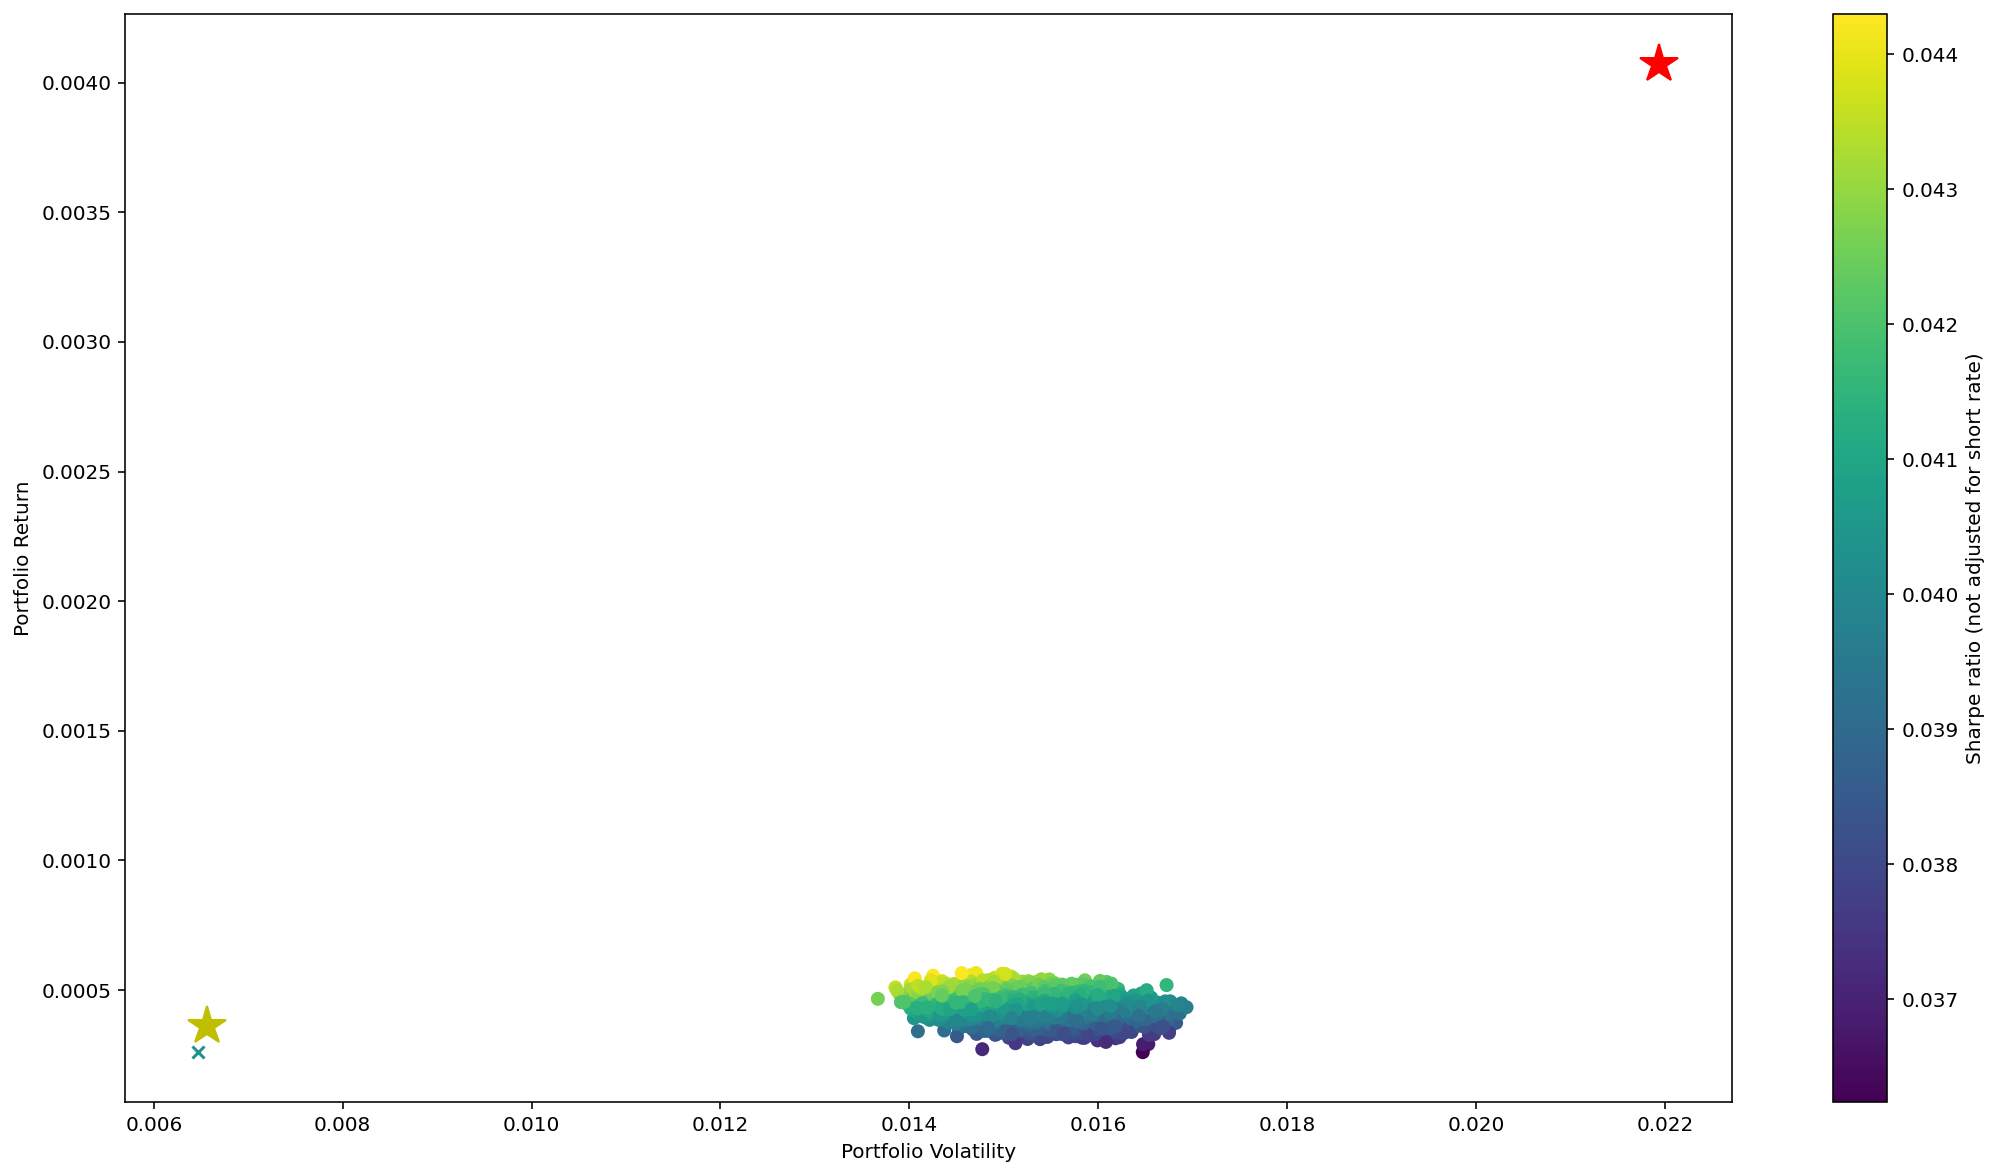

In [57]:
%%time
# plot efficient frontier

plt.figure(figsize=(18,10))
plt.scatter(port_vols, port_returns,c=(port_returns/port_vols),marker='o')
plt.scatter(minimal_volatilities,target_returns,c=(target_returns/minimal_volatilities),marker='x')
plt.plot(portfolio_stats(optimal_sharpe_weights)['volatility'],portfolio_stats(optimal_sharpe_weights)['return'],'r*',markersize=20)
plt.plot(portfolio_stats(optimal_variance_weights)['volatility'],portfolio_stats(optimal_variance_weights)['return'],'y*',markersize=20)
plt.xlabel('Portfolio Volatility')
plt.ylabel('Portfolio Return')
plt.colorbar(label='Sharpe ratio (not adjusted for short rate)')

In [58]:
# %%time

# min_index = np.argmin(minimal_volatilities)
# ex_returns = target_returns[min_index:] 
# ex_volatilities = minimal_volatilities[min_index:]

# # splrep - Given the set of data points (x[i], y[i]) determine a smooth spline approximation of degree k on the interval xb <= x <= xe.
# spline = sci.splrep(ex_returns, ex_volatilities)

# def func(x):
#     # splev - Given the knots and coefficients of a B-spline representation, evaluate the value of the smoothing polynomial and its derivatives. 
#     spline_approx = sci.splev(x,spline,der=0)
#     return spline_approx

# def d_func(x):
#     # derivative of the smoothing polynomial 
#     deriv = sci.splev(x,spline,der=1)
#     return deriv

# def eqs(p,rfr = 0.002): #three p values we need to guess
#     eq1 = rfr - p[0]
#     eq2 = rfr + p[1] * p[2] - func(p[2]) # rfr+(dy/dx * x)-f(x) = rfr+dy-y=0 
#     eq3 = p[1] - d_func(p[2]) # dy/dx-dx=0
#     return eq1, eq2, eq3

# rfr = 0.002
# m = port_vols.max()/len(df_invest.columns)*2
# l = port_returns.max()/len(df_invest.columns)*2

# optimal = optimize.fsolve(eqs,[rfr,m,l]) #solve nonlinear equations eqs giving starting point to guess
# print(optimal)
# np.round(eqs(optimal),4)

In [59]:
%%time

#risk free rate configuration
rfr = 0.0005

def portfolio_stats(weights):
    # Convert to array in case list was passed instead.
    weights = np.array(weights)
    port_return = np.sum(df_invest.mean() * weights)
    port_vol = np.sqrt(np.dot(weights.T, np.dot(df_invest.cov(), weights))) 
    sharpe = (port_return-rfr)/port_vol # here we DONT assume risk free rate is 0
    return {'return':port_return,'volatility':port_vol,'sharpe':sharpe}

# this is when slope of the efficent frontier is highest
def minimize_sharpe(weights): #minimize negative sharpe=max sharp
    return -portfolio_stats(weights)['sharpe']

constraints = ({'type' : 'eq', 'fun': lambda x: np.sum(x) -1}) # sum of weight is 1
result = optimize.minimize(minimize_sharpe,initializer,method='SLSQP',bounds=bounds,constraints=constraints)
optimal_weights = result['x'].round(2)
display(list(zip(df_invest.columns, list(optimal_weights))))
optimal_stats=portfolio_stats(optimal_weights)
print(optimal_stats)

[('AAPL', 1.0),
 ('ABCB', -0.12),
 ('ACAD', 0.05),
 ('ADBE', 0.02),
 ('AEIS', -0.29),
 ('AIMC', 0.25),
 ('AKAM', -0.48),
 ('ALGN', 0.36),
 ('ALGT', 0.17),
 ('ALKS', -0.46),
 ('ALNY', 0.06),
 ('ALXN', 0.37),
 ('AMAT', -0.31),
 ('AMGN', -0.64),
 ('AMKR', -0.24),
 ('AMSF', 0.39),
 ('AMWD', -0.02),
 ('AMZN', 0.96),
 ('ANSS', 0.01),
 ('ARNA', -0.15),
 ('ASML', 0.99),
 ('ASTE', -0.03),
 ('ATRC', -0.12),
 ('AZPN', 0.1),
 ('BANF', -0.1),
 ('BBBY', -0.28),
 ('BECN', -0.32),
 ('BIDU', -0.05),
 ('BLDR', -0.05),
 ('BLKB', -0.35),
 ('BMRN', -0.12),
 ('BRKS', -0.16),
 ('CACC', 0.26),
 ('CAKE', -0.29),
 ('CALM', 0.56),
 ('CASH', 0.08),
 ('CASY', 0.44),
 ('CBRL', 0.36),
 ('CCMP', 0.37),
 ('CENT', -0.05),
 ('CERN', 0.27),
 ('CGEN', 0.08),
 ('CGNX', 0.41),
 ('CHKP', -0.15),
 ('CHRW', -0.5),
 ('CME', -0.49),
 ('CNMD', 0.12),
 ('COKE', -0.1),
 ('COLB', -0.31),
 ('COLM', 0.11),
 ('CORT', 0.08),
 ('CPRT', 0.98),
 ('CREE', 0.01),
 ('CROX', -0.11),
 ('CRUS', -0.09),
 ('CSCO', -1.0),
 ('CSGP', 0.33),
 ('CSGS',

{'return': 0.01654287586818067, 'volatility': 0.09158378819824528, 'sharpe': 0.1751715689402772}
Wall time: 4min 35s


{'return': 0.01654287586818067,
 'volatility': 0.09158378819824528,
 'sharpe': 0.1751715689402772}

0.01654287586818067
0.09158378819824528
slope is 0.1751715689402772
Wall time: 115 ms


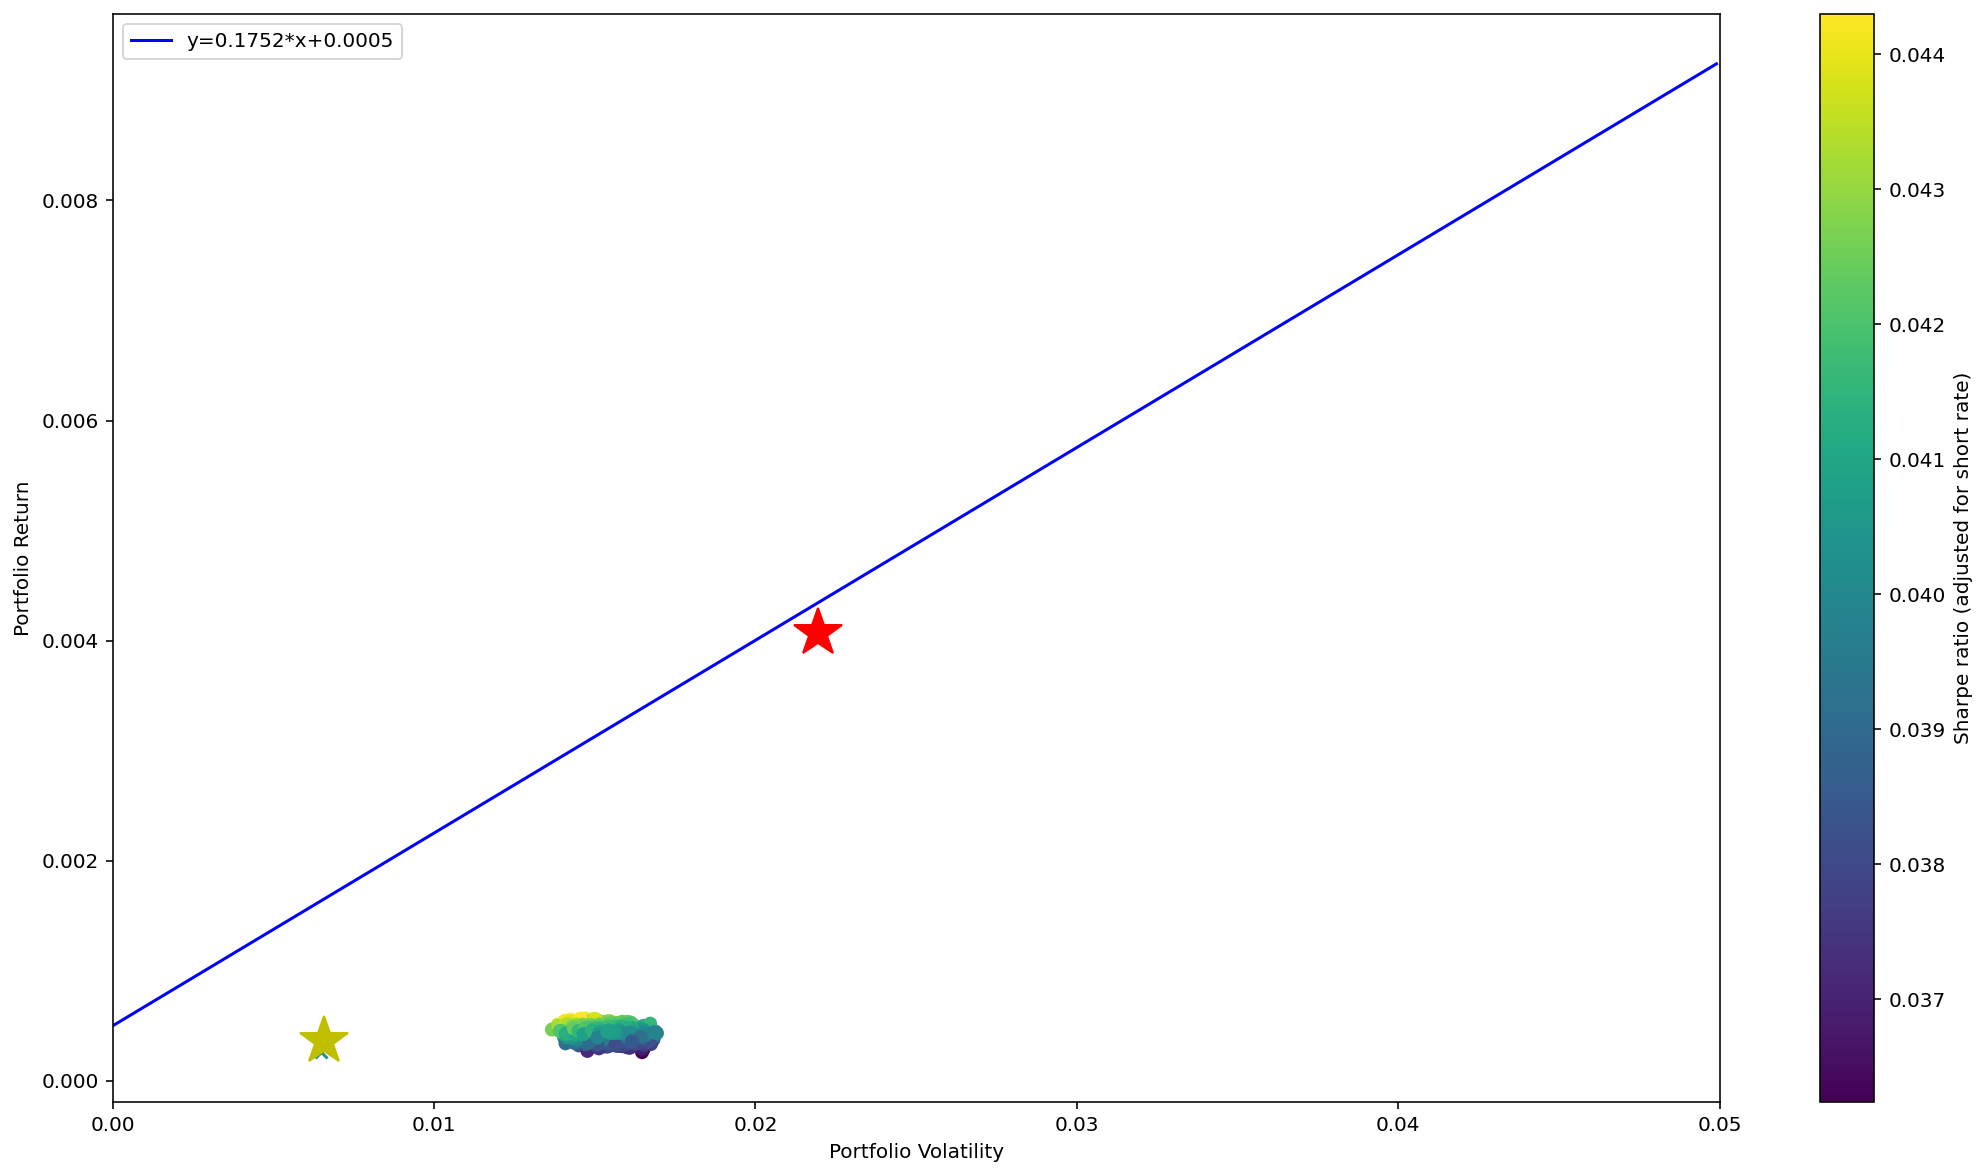

In [60]:
%%time
# plot CML

plt.figure(figsize=(18,10))
plt.scatter(port_vols,port_returns,c=(port_returns/port_vols), marker = 'o')
plt.scatter(minimal_volatilities, target_returns,c=(target_returns/minimal_volatilities),marker='x')
plt.plot(portfolio_stats(optimal_sharpe_weights)['volatility'],portfolio_stats(optimal_sharpe_weights)['return'],'r*',markersize = 25.0)
plt.plot(portfolio_stats(optimal_variance_weights)['volatility'], portfolio_stats(optimal_variance_weights)['return'],'y*',markersize = 25.0)
plt.xlabel('Portfolio Volatility')
plt.ylabel('Portfolio Return')
plt.colorbar(label='Sharpe ratio (adjusted for short rate)')

##########same above################if not work need to run this cell twice or the above half and second half seperately

plt.xlim(0,0.05)
x= np.arange(0,0.05,0.0001)
# plt.ylim(0,0.0004)
# plt.yticks(np.arange(0, 0.0005, 0.0001))
# plt.xticks(np.arange(0, 0.017, 0.0001))
display(optimal_stats)
print(optimal_stats['return'])
print(optimal_stats['volatility'])
print('slope is '+str(optimal_stats['sharpe']))
#y = (optimal[2]-optimal[0])/optimal[1]*x+optimal[0]
#y = (optimal_stats['return']-optimal[0])/optimal_stats['volatility']*x+optimal[0]
y = optimal_stats['sharpe']*x+rfr
plt.plot(x, y,'-b',label='y='+str(round(optimal_stats['sharpe'],4))+'*x+'+str(rfr))
plt.legend(loc='upper left')